In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors   import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('DATA_Customer-churn_magda.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [4]:
df.isnull().value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  MonthlyCharges  TotalCharges  Churn
False   False          False    False       False   False         False           False         False             False        False        False            False     False           False         False    7043
dtype: int64

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [8]:
features = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']

In [9]:
scaler = StandardScaler()

In [10]:
X_scaled = scaler.fit(df[features])
X_scaled = scaler.transform(df[features])

In [11]:
X_scaled_df = pd.DataFrame(X_scaled, columns = features)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, df['Churn'])

Knn Model

In [13]:
y_train = np.array(y_train)

In [14]:
knn_model = knn(n_neighbors=8)

In [15]:
knn_model = knn_model.fit(X_train, y_train)

In [16]:
y_pred_knn = knn_model.predict(X_test)

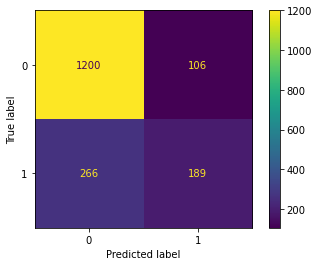

In [17]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

ConfusionMatrixDisplay(confusion_matrix = cm_knn).plot()

In [18]:
y_pred_knn = knn_model.predict(X_test)
y_pred_train_knn = knn_model.predict(X_train)
y_pred_test_knn = knn_model.predict(X_test)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn, average='binary', pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_knn, average='binary', pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn,average='binary', pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_knn,average='binary', pos_label="Yes")]})
display(performance_knn)

,Error_metric,Train,Test
0,Accuracy,0.819197,0.788756
1,Precision,0.764097,0.640678
2,Recall,0.469590,0.415385


Logistic Model

In [19]:
logreg = LR()

In [20]:
log_model = logreg.fit(X_train, y_train)

In [21]:
y_pred_log = logreg.predict(X_test)
y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

Evaluation

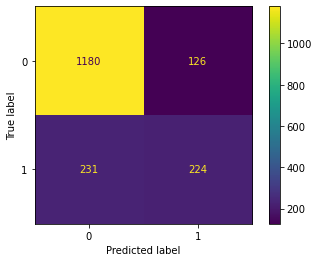

In [22]:
cm_log = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(confusion_matrix = cm_log).plot()


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [24]:
y_pred_train_log[0]

'No'

In [25]:
y_train = np.array(y_train)

In [26]:
y_train[0]

'No'

In [27]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log, average='binary', pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_log, average='binary', pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,average='binary', pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_log,average='binary', pos_label="Yes")]})
display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.787580,0.797274
1,Precision,0.650515,0.640000
2,Recall,0.446252,0.492308
